# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: John Paparrizos / Tom Bihari
- Section: Wednesday/Friday 11:10 AM
- Student Name: Yoojin Jeong
- Student Email: jeong.358@osu.edu
- Student ID: 500435642
***

***
# Introduction

This homework will focus on a modified version of the kaggle dataset "Pima Indians Diabets Database". It can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The overarching objective is to diagnostically predict whether or not a patient has diabetes based upon several other covariates. The full description is shown on the website.

Your task will be to first:
1) Do the prerequisite EDA to understand the data set you will be working on. 
2) Fit an appropriate logistic model and analyze it.

While some of the questions have exact answers, a few others are more open to interpretation. However, what we're looking for is the correct thinking and analysis. For the objective questions, while some points are awarded for "the correct number", the majority of the points will be awarded for a proper analysis and logical investigation.  Therefore, for each question (as appropriate) do the following:

1) Describe what you are trying to understand, determine, or answer.
2) How you are trying to do it (e.g., What are you trying to display or compute.)
3) Do it (show and run the code).
4) Describe the results and what they tell you regarding 1) above.

Note: This does not have to be lengthy.  In some cases, you can say it all in a couple of sentences.

Note: The data has been modified in both some subtle and not-so-subtle ways. You're welcome to look at other previous work online (in kaggle, stack overflow, etc -- and in fact that's critical to learning how to write good code!) but be wary about just using other people's work. It would both be a violation of the academic code of conduct, but it may also lead you down the wrong path.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.


### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (10%)
> -	Is it well organized and does the presentation flow in a logical manner?
> -	Are there no grammar and spelling mistakes?
> -	Do the charts/graphs relate to the text?
> -	Are the summarized key points and findings understandable by non-experts?
> -	Do the Overview and Conclusions provide context for the entire exercise?
2.	Domain Understanding Phase (10%)
> -	Did you provide a reasonable level of information?
3.	Data Understanding Phase (30%)
> -	Did you find novel and/or interesting insights, or did you solely focus on simple summarizations of the data?
> -	Did you draw and present potential conclusion or observations from your analysis of the data?
> -	Did the statistics and visualizations you used make sense in the context of the data?
4.	Data Analysis Phase (40%)
> -   Did you correctly do the data cleaning steps and perform the appropriate logistic regression.
> -   Was your analysis of the significant variables appropriate.
> -   How have you justified your feature transformation and/or feature creation steps.
5.  Conclusions (10%)
> -   Did you summarize appropriately your critical findings. 
> -   Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project1_Surname_DotNumber.zip

The submitted file should be less than 10MB.


***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

db = read_csv("diabetes_hw_data_3494.csv")

NameError: name 'read_csv' is not defined

***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

This dataset is from patients at National Institute of Diabetes and Digestive and Kidney Diseases. Attributes are diagnostic measurements that help to predict whether or not a patient has diabetes. Data was collected from patients in the institute of diabetes to check if they actually have diabetes. Patients are all females who are at least 21 years old of Pima Indian heritage. 

Doctors might use this data to study the causes of diabetes. This dataset can be also used in a field of healthcare to prevent diabetes. Analyzing this dataset, users might find out the correlations between medical variables and diabetes. 

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
***

***
## Section: 2.1 - Describe the meaning and type of data for each feature.
***

There are 8 medical predictor(independent) variables.\
Pregnancies: the number of times pregnant.\
Glucose: plasma glucose concentration a 2 hours in an oral glucose tolerance test.\
BloodPressure: diastolic blood pressure (mm Hg).\
SkinThickness: triceps skin fold thickness (mm).\
Insulin: 2-hour serum insulin (mu U/ml).\
BMI: body mass index (weight in kg/(height in m)^2).\
DiabetesPedigreeFunction: diabetes pedigree function.\
Age: age in years.

There is one target(dependent) variable.\
Outcome: a class variable(0 or 1), which tells whether or not a patient has a diabetes.


***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [222]:
(db == 0).sum()

Pregnancies                 113
Glucose                       5
BloodPressure                35
SkinThickness               232
Insulin                     380
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     510
dtype: int64

In [223]:
Pregnancies and Outcome can be 
Glucose, BloodPressure, SkinThickness, Insulin, BMI

SyntaxError: invalid syntax (745209138.py, line 1)

In [224]:
print(db.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   783.000000  783.000000     783.000000     783.000000  783.000000   
mean      3.841635  121.280971      70.726692      20.968072   82.762452   
std       3.366824   32.325356      31.374634      18.732339  121.761453   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      63.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   36.000000   
75%       6.000000  141.000000      80.000000      32.000000  130.000000   
max      17.000000  199.000000     504.000000     273.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  783.000000                783.000000  783.000000  783.000000  
mean    32.360409                  0.470271   34.444444    0.348659  
std     11.463401                  0.330093   25.167961    0.476850  
min      0.000000                  

***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

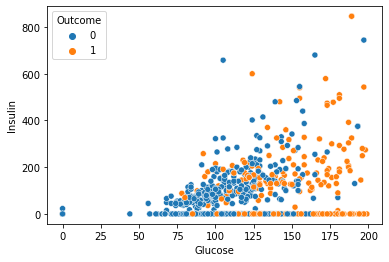

In [225]:
db.corr()
sns.scatterplot(x=db['Glucose'],y=db['Insulin'],hue=db['Outcome'])

On the x-axis, as glucose concentration increases, there are more outcomes with 1.\
In other words, people with higher plasma glucose concentration are more likely to have diabetes.\
At this graph, insulin and glucose show positive correlation. This does not make sense because insulin make blood glucose level go down. 

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

In [250]:
(db == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Pregnancies and Outcome can be measured as zero. However, Glucose, BloodPressure, SkinThickness, Insulin, and BMI cannot be measured as zero. Therefore, Glucose, BloodPressure, SkinThickness, Insulin, and BMI with zero values can be considered as missing values.

In [227]:
db.duplicated(subset=['Pregnancies', 'Glucose', 'BloodPressure']).sum()

29

There are 29 duplicates considering 3 attributes: Pregnancies, Glucose, BloodPressure.

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

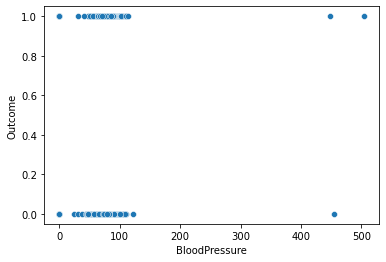

In [228]:
sns.scatterplot(x="BloodPressure", y="Outcome", data=db)

There are points that are apart from most of the observations, which are considered as outliers.\
Outliers can also be detected by looking at the mean and max values.\
Mean of BloodPressure is 31.374634, but max is 504.

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

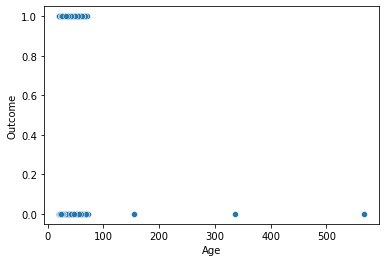

In [229]:
sns.scatterplot(x="Age", y="Outcome", data=db)

Age is mostly in between 21 and around 80, however there are points that differ significantly from other observations.\
Human beings can't live more than 150 years, age higher than 150 can be considered as outliers.

***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

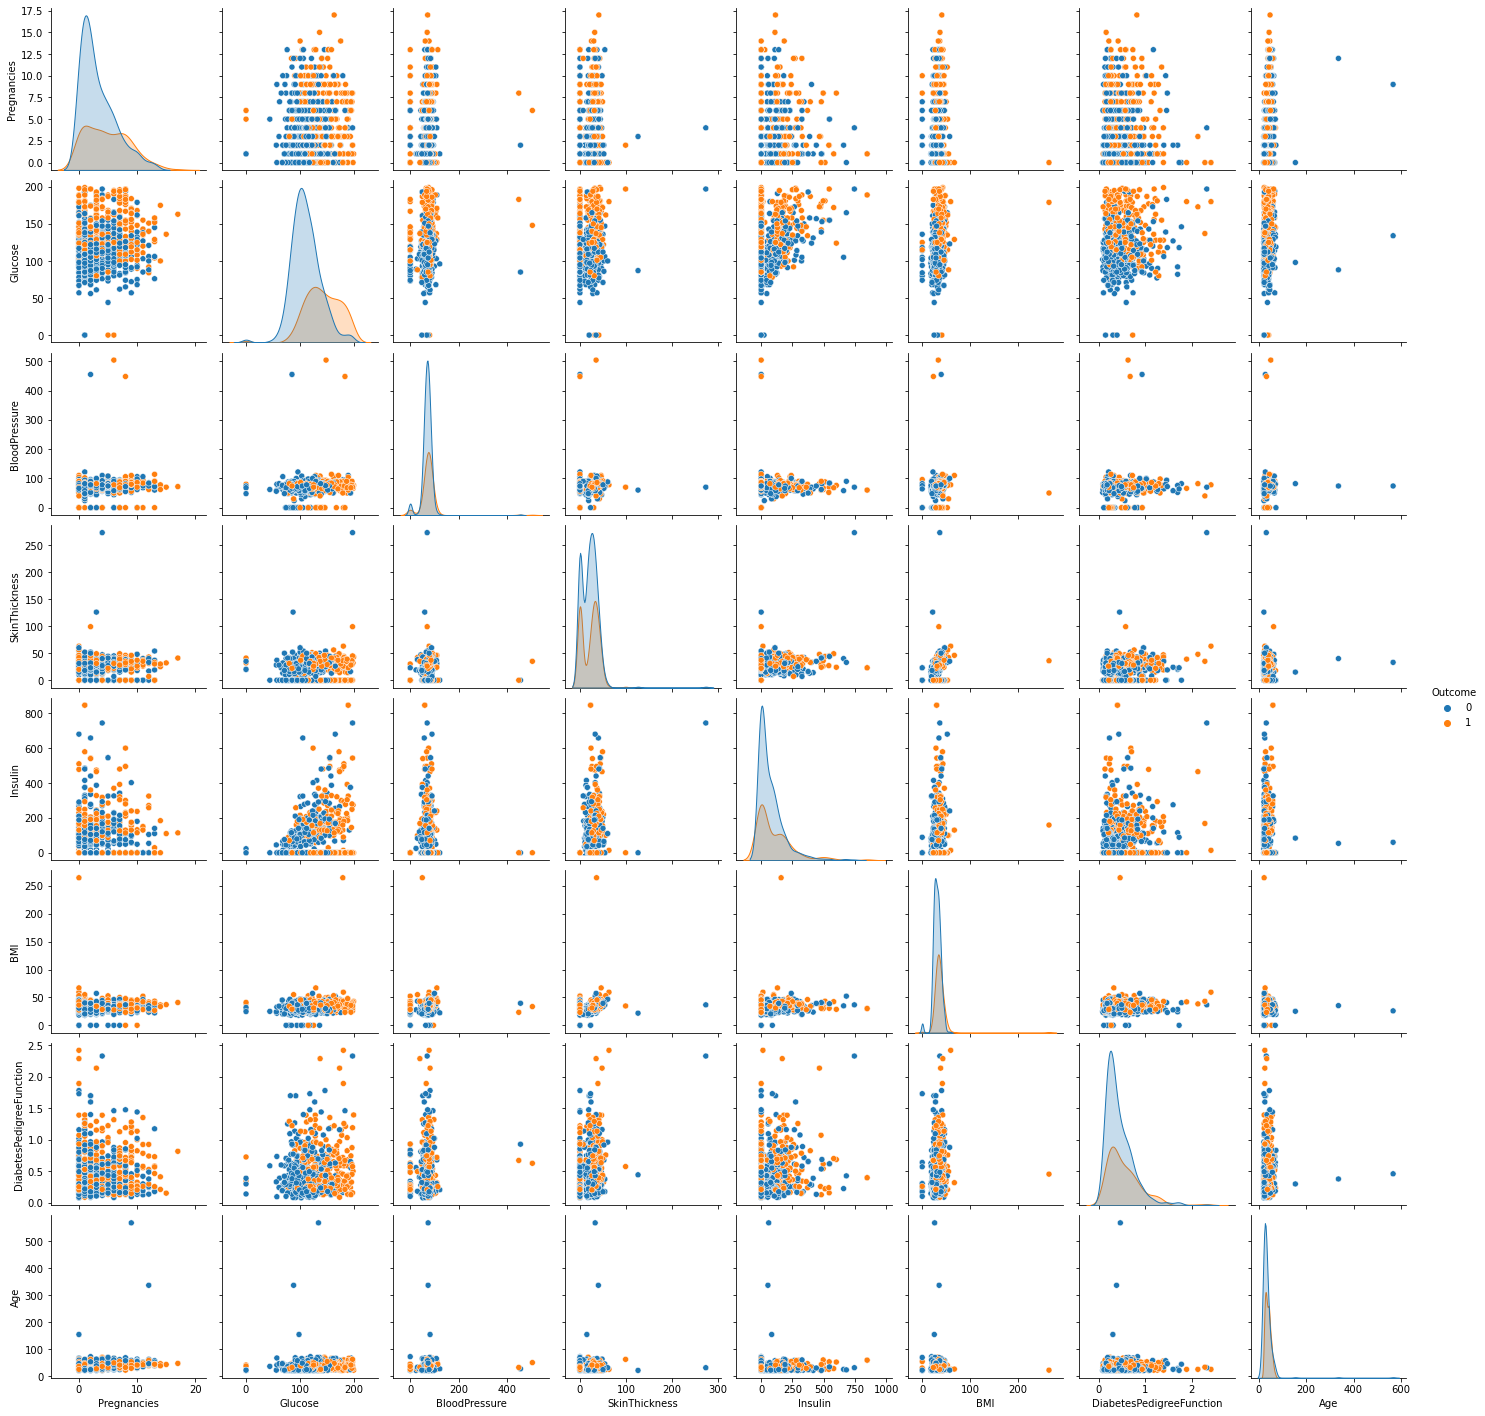

In [230]:
sns.pairplot(db, hue = "Outcome")

We've seen that there are many missing values, duplicated data, and outliers in this dataset.\
Therefore, there are no clear graphs that show high correlations among the features.

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 
***

<AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>

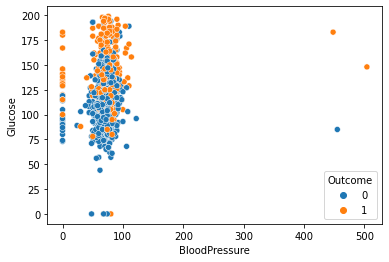

In [231]:
sns.scatterplot(x=db['BloodPressure'],y=db['Glucose'],hue=db['Outcome'])

Looking at the y-axis of the scatterplot, there are more outcomes with value '1' as glucose increases.\
This implies that people are likely to have diabetes if they have high glucose concentration.

***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How many duplicate records were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***

In [275]:
db.duplicated().sum()

15

In [276]:
db[db.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


In [277]:
#drop duplicate values
db.drop_duplicates(inplace = True)

In [286]:
db.head()
Q1 = db.quantile(0.25)
Q3 = db.quantile(0.75)
IQR = Q3 - Q1
((db < (Q1 - 1.5 * IQR)) | (db > (Q3 + 1.5 * IQR))).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [285]:
db.head()
Q1 = db.quantile(0.25)
Q3 = db.quantile(0.75)
IQR = Q3 - Q1
db[(db < (Q1 - 1.5 * IQR)) | (db > (Q3 + 1.5 * IQR))] = np.nan
db.fillna(db.quantile(0.5), inplace=True)

In [287]:
#drop missing values
for x in db.head():
    if x != 'Pregnancies' and x != 'Outcome':
        db[x] = db[x].replace(0, db[x].mean())

In [288]:
print(db.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.782552  121.656250      72.127604      26.459715   80.171712   
std       3.270644   30.438286      10.867190       9.277456   49.468203   
min       0.000000   44.000000      40.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.423177   51.309896   
50%       3.000000  117.000000      72.000000      23.000000   51.309896   
75%       6.000000  140.250000      80.000000      32.000000  100.000000   
max      13.000000  199.000000     104.000000      63.000000  250.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.099479                  0.406253   32.016927    0.348958  
std      6.281414                  0.216338   10.060753    0.476951  
min     18.200000                  

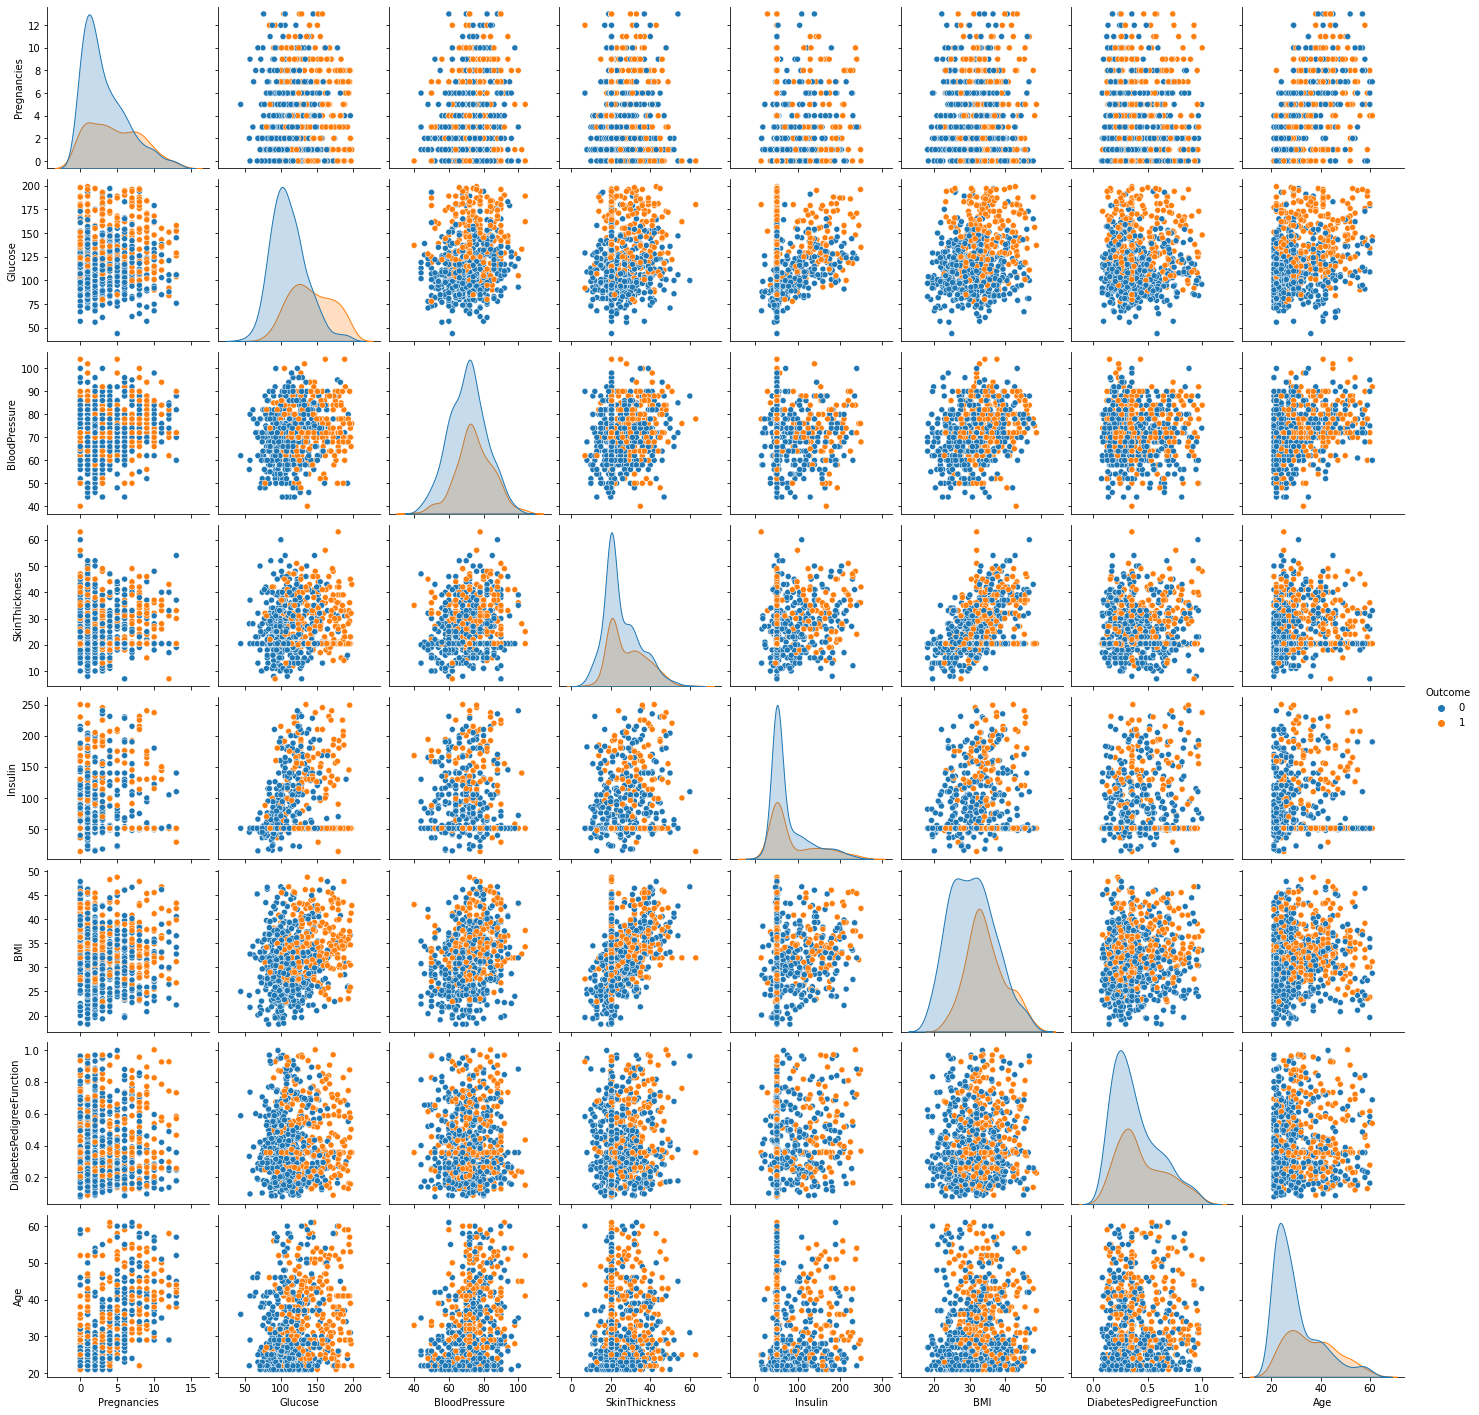

In [289]:
sns.pairplot(db, hue = "Outcome")

***
## Section: 3.2 - Did you decide to implement any feature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

In [ ]:
Looking at the correlation matrices above, scatterplots do not really show high correlations between attributes even after dropping missing values, duplicate values, and outliers.\
Therefore, the dataset should be transformed so that attributes are highly correlated to each other.\
In that way, users of this dataset could know the cause of diabetes.

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

I do not think it is necessary to create new features because adding new feature might not give a positive effect on analyzing this dataset. Adding a new feature might make unclear correlation between other features.

***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

In [ ]:
By analyzing the given data and checking if there are some data that should be clean, I was able to organize the dataset in a better way.\
By dropping unnecessary data such as missing values, duplicate values, and outliers, the dataset got more reliable and useful.\
I learned that cleaning data to make the dataset meaningful is very important because unnecessary data might affect the analysis in negative way.\
For future research, I would look for other medical variables that are collected when testing diabetes, and try to see correlation between the outcome.